<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Image Processing</center></h1>

<center><p float="center">
  <img src="https://cdn.pixabay.com/photo/2020/03/16/16/29/virus-4937553_1280.jpg" width="720"/>
</p></center>

<center><font size=6>Covid-19 Image Classification</font></center>

# Problem Statement

## Business Context

COVID-19 is a rapidly spreading disease that severely impacts human health, often leading to lung infections. While vaccines help strengthen immunity, their effects take time. The virus has also had a significant impact on economies worldwide.  

Advancements in technology now assist healthcare professionals in analyzing medical images for better diagnosis. By examining lung X-rays, these methods can help differentiate between healthy individuals, common respiratory infections, and COVID-19, supporting more accurate medical assessments.

## Objective

The aim of this project is to Build a Artificial Neural Network to differentiate an X-ray image of a person affected with covid from that of a healthy person or a person who has viral pneumonia(fever).

## Data Description

This dataset contains training set images of 3 classes which are converted into numpy arrays.


**COVID-19:** The patient who is effected due to covid.

**Viral Pneumonia:** This is a viral fever which has similar characteristics like fever and cought that of Covid but is not covid.

**Normal:** A healthy Person with no symptoms of covid or fever.

The data file names are:

- CovidImages.npy

- CovidLabels.csv




####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the Necessary Libraries

In [1]:
#Installing the necessary libraries
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.2 opencv-python==4.11.0.86 matplotlib==3.10.0 numpy==1.26.4 pandas==2.2.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
tensorstore 0.1.72 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [4]:
# Uncomment and run the following code in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load the image file of the dataset
rgb_images = np.load('CovidImages.npy')

# Load the labels file of the dataset
labels = pd.read_csv('CovidLabels.csv')

# Data Overview


Let's print the shape of the images and labels

In [6]:
print(rgb_images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


There are 251 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

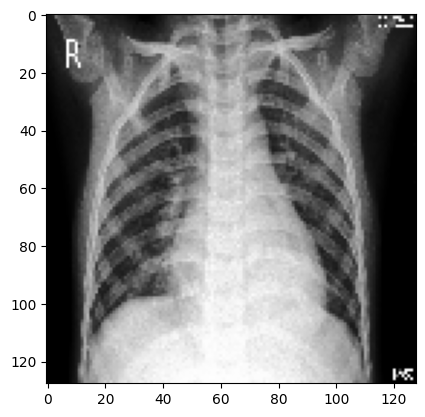

In [7]:
n = 5
plt.imshow(rgb_images[n])

# Exploratory Data Analysis

This function, `plot_images`, randomly selects images from a dataset and displays them in a 3x4 grid. It retrieves corresponding labels from a dictionary and sets them as titles for each image.

In [8]:
def plot_images(images,labels):
    keys=dict(labels['Label'])
    rows = 3
    cols = 4
    fig = plt.figure(figsize=(10, 8))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(images[random_index, :])
            ax.set_title(keys[random_index])
    plt.show()

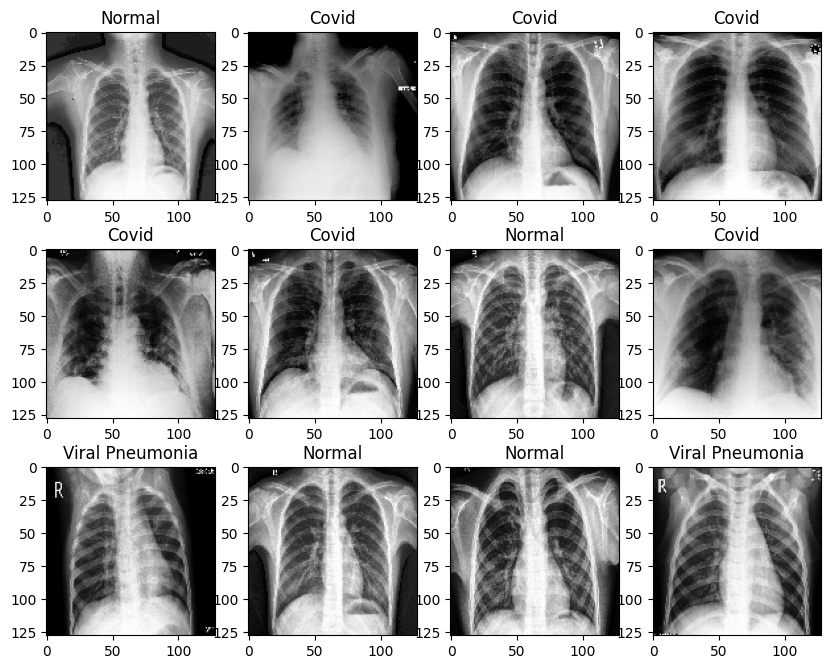

In [9]:
plot_images(rgb_images,labels)

### Checking for class imbalance

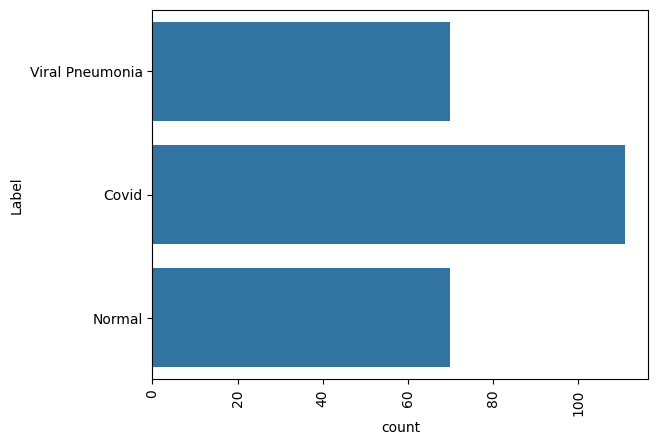

In [10]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

# Data Preprocessing

We define a function, ***`grid_plot`***, to display two images side by side: the original image and its processed version. It helps visually compare the effects of image processing techniques.

**Inputs:**

- `img1`: The original image.

- `img2`: The processed image

- `gray` (optional, default: False): If True, displays the processed image in grayscale.

**Output:**
- The original image displayed on the left and the processed image on the right.


In [11]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

## Grayscale

In [12]:
gray_images = []
for i in range(len(rgb_images)):
  gray_images.append(cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY))

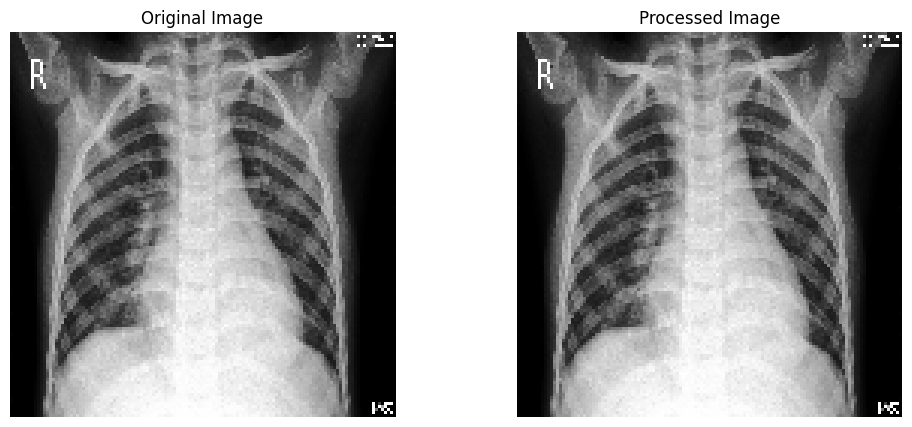

In [13]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gray_images[n],gray=True)

- As expected, the RGB component is removed.  

- If the species are not distinguished based on color, then this feature will be highly beneficial as it also reduces computational requirements.

## Gaussian blur

In [14]:
gaus_blur_images = []
for i in range(len(gray_images)):
  gaus_blur_images.append(cv2.GaussianBlur(rgb_images[i], (3,3), 0))

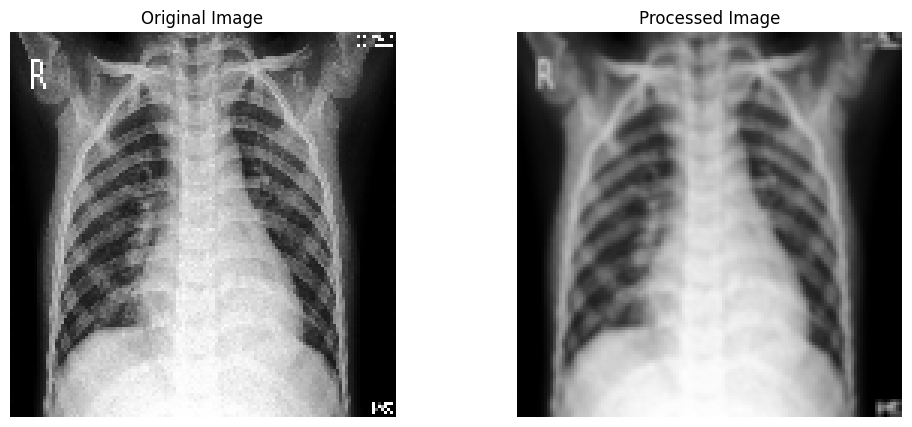

In [15]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gaus_blur_images[n])

- The Gaussian blur provides a smoothing effect.  

- This will be useful if the images are too sharp, as it also helps reduce noise.

## Laplacian Filter

In [16]:
edge_images = []
for i in range(len(gray_images)):
    edge_images.append(cv2.Laplacian(gray_images[i],cv2.CV_64F))

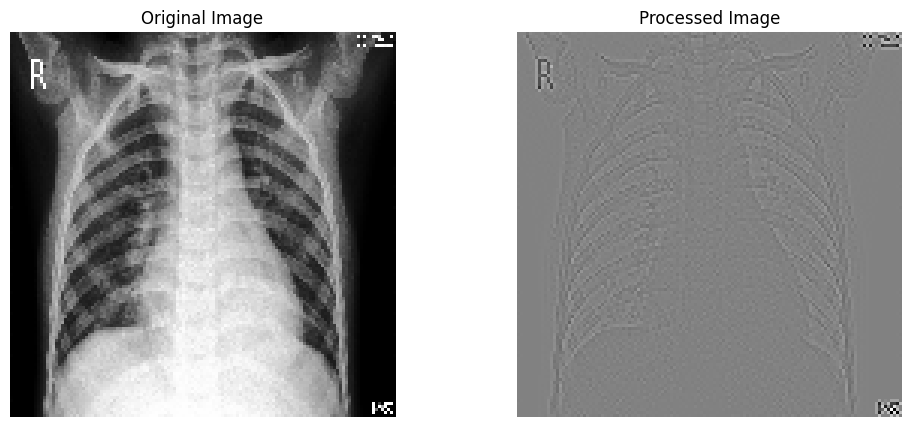

In [17]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],edge_images[n],gray=True)

- Based on this, the edge feature does not appear to be useful.

- It is also capturing the background. If we isolate the monkey from the background, this feature might become useful.

## Splitting the dataset

In [80]:
from sklearn.model_selection import train_test_split
X_train_rgb, X_temp_rgb, y_train_rgb, y_temp_rgb = train_test_split(np.array(rgb_images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_rgb, X_test_rgb, y_val_rgb, y_test_rgb = train_test_split(X_temp_rgb,y_temp_rgb , test_size=0.5, random_state=42,stratify=y_temp_rgb)

In [81]:
from sklearn.model_selection import train_test_split
X_train_gray, X_temp_gray, y_train, y_temp = train_test_split(np.array(gray_images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_gray, X_test_gray, y_val, y_test = train_test_split(X_temp_gray,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [82]:
from sklearn.model_selection import train_test_split
X_train_blur, X_temp_blur, y_train_blur, y_temp_blur = train_test_split(np.array(gaus_blur_images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_blur, X_test_blur, y_val_blur, y_test_blur = train_test_split(X_temp_blur,y_temp_blur,test_size=0.5, random_state=42,stratify=y_temp_blur)

In [83]:
from sklearn.model_selection import train_test_split
X_train_edge, X_temp_edge, y_train_edge, y_temp_edge = train_test_split(np.array(edge_images),labels , test_size=0.2, random_state=42,stratify=labels)
X_val_edge, X_test_edge, y_val_edge, y_test_edge = train_test_split(X_temp_edge,y_temp_edge,test_size=0.5, random_state=42,stratify=y_temp_edge)

## Encoding the target labels

- Convert labels from categories to one hot vectors

- `LabelBinarizer` is a preprocessing utility in `sklearn.preprocessing` that converts categorical labels into a binary (one-hot) representation.

- It is useful for transforming multi-class labels into a format suitable for models that require numerical input.

- `fit_transform()` learns the unique classes from the data and converts labels into a binary format in one step.

- `transform()` converts new data using the already learned classes without refitting.


In [22]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train_rgb)
y_val_encoded = enc.transform(y_val_rgb)
y_test_encoded = enc.transform(y_test_rgb)

In [23]:
print(y_train_encoded[0])

[1 0 0]


## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [24]:
# Normalizing the image pixels
X_train_rgb = X_train_rgb.astype('float32')/255.0
X_val_rgb = X_val_rgb.astype('float32')/255.0
X_test_rgb = X_test_rgb.astype('float32')/255.0

In [25]:
# Normalizing the image pixels
X_train_gray = X_train_gray.astype('float32')/255.0
X_val_gray = X_val_gray.astype('float32')/255.0
X_test_gray = X_test_gray.astype('float32')/255.0

In [26]:
# Normalizing the image pixels
X_train_blur = X_train_blur.astype('float32')/255.0
X_val_blur = X_val_blur.astype('float32')/255.0
X_test_blur = X_test_blur.astype('float32')/255.0

In [27]:
# Normalizing the image pixels
X_train_edge = X_train_edge.astype('float32')/255.0
X_val_edge = X_val_edge.astype('float32')/255.0
X_test_edge = X_test_edge.astype('float32')/255.0

# Model Building

## Utility Functions

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [29]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

## ANN with RGB Images

In [84]:
num_classes = labels['Label'].nunique()
image_size = X_train_rgb[0].size
shape = X_train_rgb.shape[1:]

In [85]:
model_1 = Sequential()
model_1.add(Input(shape=(shape[0],shape[1],shape[2])))
model_1.add(Flatten())
model_1.add(Dense(20, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_1.add(Dense(10, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(5, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(num_classes, activation='softmax'))

In [86]:
adam = optimizers.Adam()
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [87]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 49152)             0         
                                                                 
 dense_28 (Dense)            (None, 20)                983060    
                                                                 
 dense_29 (Dense)            (None, 10)                210       
                                                                 
 dense_30 (Dense)            (None, 5)                 55        
                                                                 
 dense_31 (Dense)            (None, 3)                 18        
                                                                 
Total params: 983343 (3.75 MB)
Trainable params: 983343 (3.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`ImageDataGenerator` in Keras is used to efficiently load and iterate over image datasets during model training.

In [88]:
train_datagen = ImageDataGenerator()

The `flow()` function generates batches of images from in-memory NumPy arrays (X, y), providing a convenient way to feed data into a neural network.

In [89]:
history_1 = model_1.fit(train_datagen.flow(X_train_rgb,y_train_encoded,batch_size=128),validation_data = (X_val_rgb,y_val_encoded),epochs=15, verbose=2)

Epoch 1/15
2/2 - 1s - loss: 336.8831 - accuracy: 0.3650 - val_loss: 1.0984 - val_accuracy: 0.4400 - 931ms/epoch - 466ms/step
Epoch 2/15
2/2 - 0s - loss: 1.0983 - accuracy: 0.4400 - val_loss: 1.0982 - val_accuracy: 0.4400 - 183ms/epoch - 91ms/step
Epoch 3/15
2/2 - 0s - loss: 1.0981 - accuracy: 0.4400 - val_loss: 1.0980 - val_accuracy: 0.4400 - 151ms/epoch - 76ms/step
Epoch 4/15
2/2 - 0s - loss: 1.0979 - accuracy: 0.4400 - val_loss: 1.0978 - val_accuracy: 0.4400 - 130ms/epoch - 65ms/step
Epoch 5/15
2/2 - 0s - loss: 1.0977 - accuracy: 0.4400 - val_loss: 1.0975 - val_accuracy: 0.4400 - 115ms/epoch - 57ms/step
Epoch 6/15
2/2 - 0s - loss: 1.0975 - accuracy: 0.4400 - val_loss: 1.0973 - val_accuracy: 0.4400 - 114ms/epoch - 57ms/step
Epoch 7/15
2/2 - 0s - loss: 1.0972 - accuracy: 0.4400 - val_loss: 1.0971 - val_accuracy: 0.4400 - 157ms/epoch - 79ms/step
Epoch 8/15
2/2 - 0s - loss: 1.0970 - accuracy: 0.4400 - val_loss: 1.0968 - val_accuracy: 0.4400 - 209ms/epoch - 104ms/step
Epoch 9/15
2/2 - 0s 

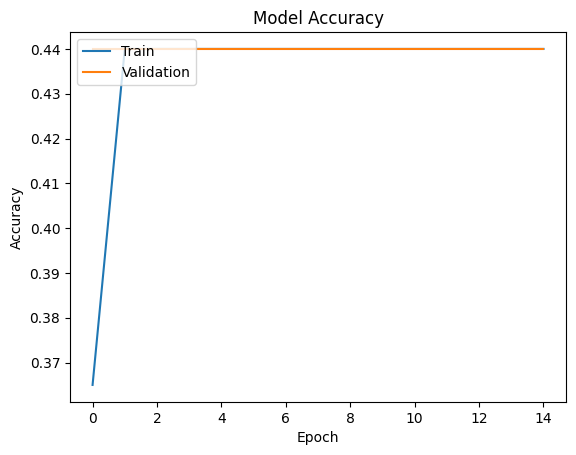

In [90]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [91]:
model_1_train_perf = model_performance_classification(model_1, X_train_rgb,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

7/7 [==============================] - 0s 4ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.44    0.44     0.1936  0.268889


In [92]:
model_1_valid_perf = model_performance_classification(model_1, X_val_rgb,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

1/1 [==============================] - 0s 29ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.44    0.44     0.1936  0.268889


7/7 [==============================] - 0s 4ms/step


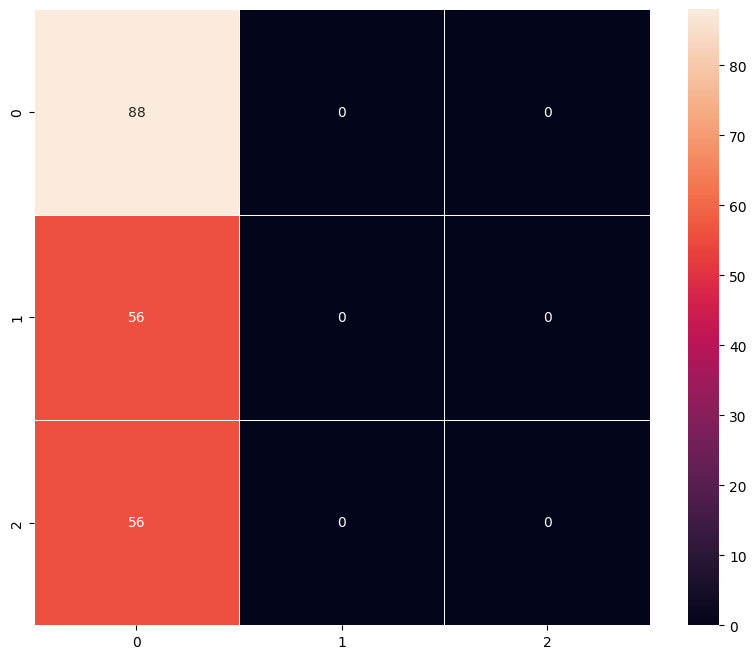

In [93]:
plot_confusion_matrix(model_1,X_train_rgb,y_train_encoded)

## ANN with Grayscale Images

In [94]:
num_classes = labels['Label'].nunique()

X_train_gray = np.expand_dims(X_train_gray,axis=-1)
image_size = X_train_gray[0].size
shape = X_train_gray.shape[1:]

In [95]:
model_2 = Sequential()
model_2.add(Input(shape=(shape[0],shape[1],shape[2])))
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_2.add(Dense(20, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(5, activation='relu',kernel_initializer='he_uniform'))

model_2.add(Dense(num_classes, activation='softmax'))

In [96]:
adam = optimizers.Adam()
model_2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [97]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 dense_32 (Dense)            (None, 50)                819250    
                                                                 
 dense_33 (Dense)            (None, 20)                1020      
                                                                 
 dense_34 (Dense)            (None, 10)                210       
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
 dense_36 (Dense)            (None, 3)                 18        
                                                                 
Total params: 820553 (3.13 MB)
Trainable params: 82055

In [98]:
train_datagen = ImageDataGenerator()

In [99]:
history_2 = model_2.fit(train_datagen.flow(X_train_gray,y_train_encoded,batch_size=128),validation_data = (X_val_gray,y_val_encoded),epochs=10, verbose=2)

Epoch 1/10
2/2 - 1s - loss: 204.3707 - accuracy: 0.2250 - val_loss: 302.4728 - val_accuracy: 0.6400 - 908ms/epoch - 454ms/step
Epoch 2/10
2/2 - 0s - loss: 1258.8058 - accuracy: 0.5100 - val_loss: 1520.1477 - val_accuracy: 0.4400 - 72ms/epoch - 36ms/step
Epoch 3/10
2/2 - 0s - loss: 830.8304 - accuracy: 0.5150 - val_loss: 1102.1930 - val_accuracy: 0.3600 - 160ms/epoch - 80ms/step
Epoch 4/10
2/2 - 0s - loss: 634.8894 - accuracy: 0.5200 - val_loss: 98.7169 - val_accuracy: 0.7200 - 67ms/epoch - 33ms/step
Epoch 5/10
2/2 - 0s - loss: 194.9934 - accuracy: 0.6400 - val_loss: 343.7843 - val_accuracy: 0.5200 - 65ms/epoch - 33ms/step
Epoch 6/10
2/2 - 0s - loss: 306.1317 - accuracy: 0.5350 - val_loss: 62.2577 - val_accuracy: 0.7200 - 115ms/epoch - 57ms/step
Epoch 7/10
2/2 - 0s - loss: 87.8817 - accuracy: 0.7200 - val_loss: 115.1361 - val_accuracy: 0.6000 - 102ms/epoch - 51ms/step
Epoch 8/10
2/2 - 0s - loss: 134.9225 - accuracy: 0.6450 - val_loss: 202.7941 - val_accuracy: 0.5600 - 65ms/epoch - 32ms/

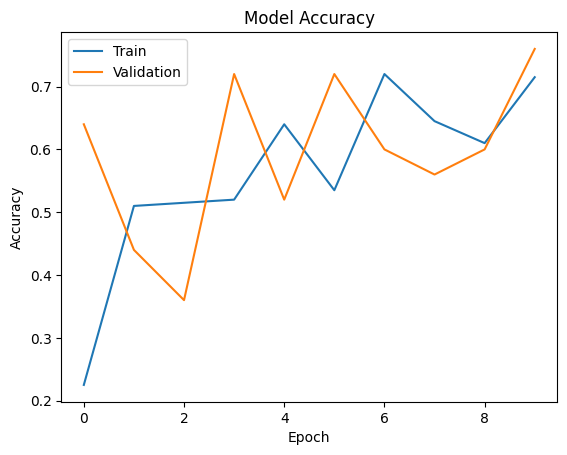

In [100]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [101]:
model_2_train_perf = model_performance_classification(model_2, X_train_gray,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

7/7 [==============================] - 0s 3ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.78    0.78     0.7992  0.785878


In [102]:
model_2_valid_perf = model_performance_classification(model_2, X_val_gray,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

1/1 [==============================] - 0s 96ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.76    0.76   0.832727  0.768889


7/7 [==============================] - 0s 2ms/step


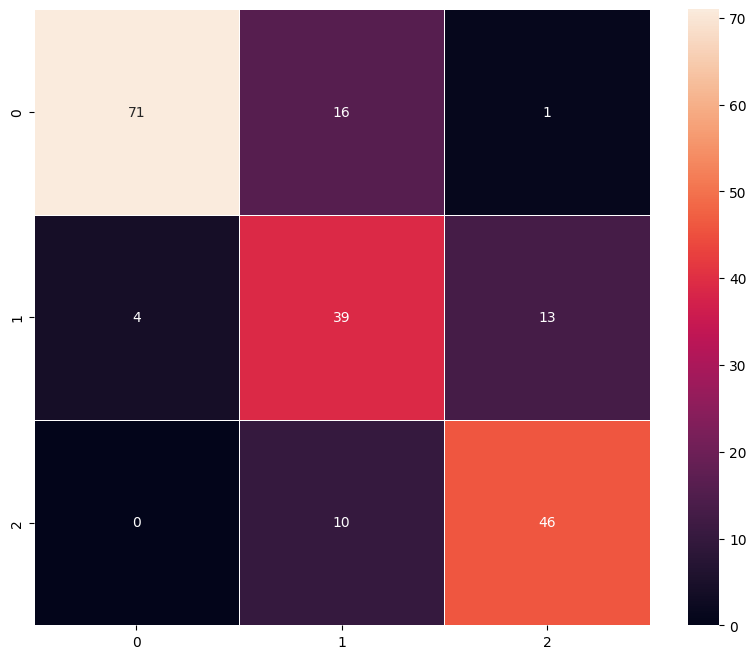

In [103]:
plot_confusion_matrix(model_2,X_train_gray,y_train_encoded)

## ANN with Gaussian-blurred Images

In [105]:
num_classes = labels['Label'].nunique()

image_size = X_train_blur[0].size
shape = X_train_blur.shape[1:]

In [106]:
model_3 = Sequential()
model_3.add(Input(shape=(shape[0],shape[1],shape[2])))
model_3.add(Flatten())
model_3.add(Dense(50, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_3.add(Dense(20, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(10, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(5, activation='relu',kernel_initializer='he_uniform'))

model_3.add(Dense(num_classes, activation='softmax'))

In [107]:
adam = optimizers.Adam()
model_3.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [108]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 49152)             0         
                                                                 
 dense_37 (Dense)            (None, 50)                2457650   
                                                                 
 dense_38 (Dense)            (None, 20)                1020      
                                                                 
 dense_39 (Dense)            (None, 10)                210       
                                                                 
 dense_40 (Dense)            (None, 5)                 55        
                                                                 
 dense_41 (Dense)            (None, 3)                 18        
                                                                 
Total params: 2458953 (9.38 MB)
Trainable params: 2458

In [109]:
train_datagen = ImageDataGenerator()

In [110]:
history_3 = model_3.fit(train_datagen.flow(X_train_blur,y_train_encoded,batch_size=128),validation_data = (X_val_blur,y_val_encoded),epochs=10, verbose=2)

Epoch 1/10
2/2 - 1s - loss: 375.1619 - accuracy: 0.2450 - val_loss: 1423.0292 - val_accuracy: 0.2800 - 991ms/epoch - 496ms/step
Epoch 2/10
2/2 - 0s - loss: 2135.1362 - accuracy: 0.3050 - val_loss: 1957.4393 - val_accuracy: 0.2800 - 206ms/epoch - 103ms/step
Epoch 3/10
2/2 - 0s - loss: 1097.6257 - accuracy: 0.3800 - val_loss: 364.2173 - val_accuracy: 0.6400 - 159ms/epoch - 79ms/step
Epoch 4/10
2/2 - 0s - loss: 313.5466 - accuracy: 0.6700 - val_loss: 174.6179 - val_accuracy: 0.6000 - 144ms/epoch - 72ms/step
Epoch 5/10
2/2 - 0s - loss: 119.3479 - accuracy: 0.6300 - val_loss: 134.2658 - val_accuracy: 0.4800 - 202ms/epoch - 101ms/step
Epoch 6/10
2/2 - 0s - loss: 127.5412 - accuracy: 0.5250 - val_loss: 77.0116 - val_accuracy: 0.5200 - 162ms/epoch - 81ms/step
Epoch 7/10
2/2 - 0s - loss: 38.8227 - accuracy: 0.4700 - val_loss: 1.0542 - val_accuracy: 0.4400 - 189ms/epoch - 94ms/step
Epoch 8/10
2/2 - 0s - loss: 2.2232 - accuracy: 0.4400 - val_loss: 1.0104 - val_accuracy: 0.4400 - 211ms/epoch - 106

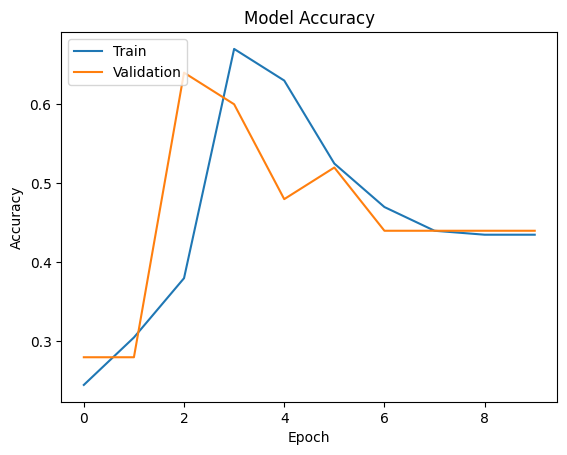

In [111]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [112]:
model_3_train_perf = model_performance_classification(model_3, X_train_blur,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

7/7 [==============================] - 0s 5ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.44    0.44     0.1936  0.268889


In [113]:
model_3_valid_perf = model_performance_classification(model_3, X_val_blur,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

1/1 [==============================] - 0s 28ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.44    0.44     0.1936  0.268889


7/7 [==============================] - 0s 5ms/step


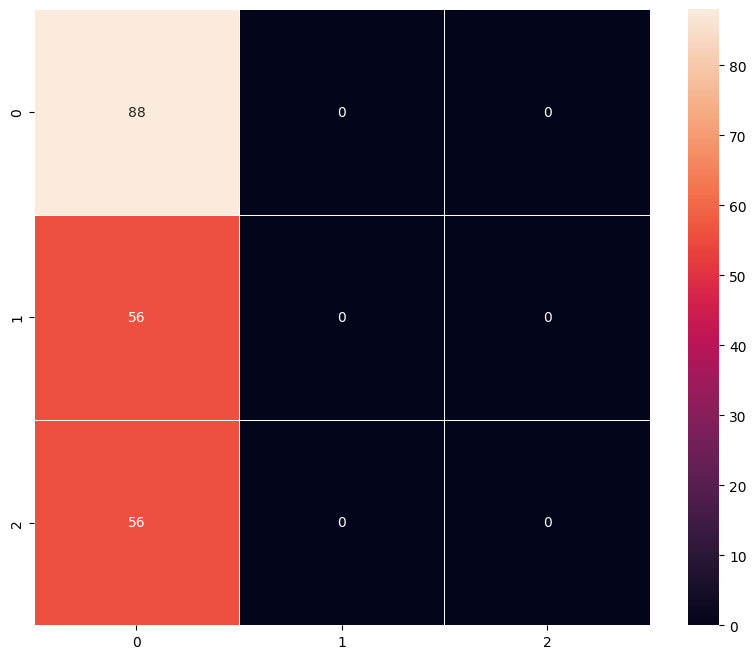

In [114]:
plot_confusion_matrix(model_3,X_train_blur,y_train_encoded)

## ANN with Laplacian-Filtered Image

In [116]:
num_classes = labels['Label'].nunique()

X_train_edge = np.expand_dims(X_train_edge,axis=-1)
image_size = X_train_edge[0].size
shape = X_train_edge.shape[1:]

In [117]:
model_4 = Sequential()
model_4.add(Input(shape=(shape[0],shape[1],shape[2])))
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_4.add(Dense(20, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(10, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(5, activation='relu',kernel_initializer='he_uniform'))

model_4.add(Dense(num_classes, activation='softmax'))

In [118]:
adam = optimizers.Adam()
model_4.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [119]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_42 (Dense)            (None, 50)                819250    
                                                                 
 dense_43 (Dense)            (None, 20)                1020      
                                                                 
 dense_44 (Dense)            (None, 10)                210       
                                                                 
 dense_45 (Dense)            (None, 5)                 55        
                                                                 
 dense_46 (Dense)            (None, 3)                 18        
                                                                 
Total params: 820553 (3.13 MB)
Trainable params: 82055

In [120]:
train_datagen = ImageDataGenerator()

In [121]:
history_4 = model_4.fit(train_datagen.flow(X_train_edge,y_train_encoded,batch_size=128),validation_data = (X_val_edge,y_val_encoded),epochs=10, verbose=2)

Epoch 1/10
2/2 - 1s - loss: 10.3196 - accuracy: 0.3800 - val_loss: 7.7895 - val_accuracy: 0.4000 - 885ms/epoch - 443ms/step
Epoch 2/10
2/2 - 0s - loss: 8.1917 - accuracy: 0.5950 - val_loss: 6.8093 - val_accuracy: 0.4000 - 84ms/epoch - 42ms/step
Epoch 3/10
2/2 - 0s - loss: 5.7508 - accuracy: 0.6600 - val_loss: 6.9391 - val_accuracy: 0.3600 - 109ms/epoch - 54ms/step
Epoch 4/10
2/2 - 0s - loss: 4.2127 - accuracy: 0.7100 - val_loss: 6.7874 - val_accuracy: 0.4000 - 92ms/epoch - 46ms/step
Epoch 5/10
2/2 - 0s - loss: 3.4306 - accuracy: 0.7250 - val_loss: 7.1075 - val_accuracy: 0.4000 - 107ms/epoch - 53ms/step
Epoch 6/10
2/2 - 0s - loss: 2.4598 - accuracy: 0.7450 - val_loss: 7.8330 - val_accuracy: 0.4400 - 66ms/epoch - 33ms/step
Epoch 7/10
2/2 - 0s - loss: 2.0359 - accuracy: 0.7600 - val_loss: 8.0477 - val_accuracy: 0.4800 - 131ms/epoch - 66ms/step
Epoch 8/10
2/2 - 0s - loss: 1.7775 - accuracy: 0.7500 - val_loss: 8.0492 - val_accuracy: 0.4800 - 118ms/epoch - 59ms/step
Epoch 9/10
2/2 - 0s - los

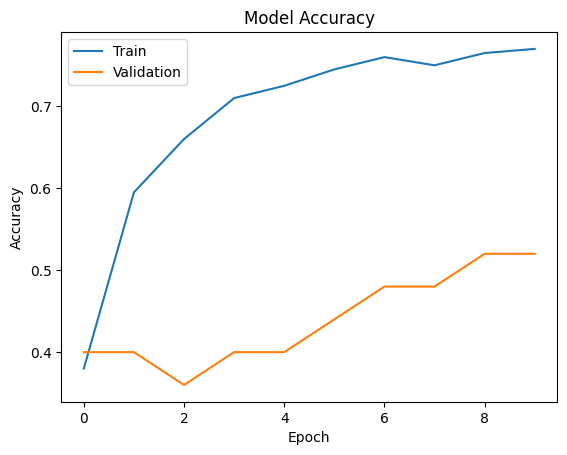

In [122]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [123]:
model_4_train_perf = model_performance_classification(model_4, X_train_edge,y_train_encoded)

print("Train performance metrics")
print(model_4_train_perf)

7/7 [==============================] - 0s 4ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.79    0.79   0.816601  0.791099


In [124]:
model_4_valid_perf = model_performance_classification(model_4, X_val_edge,y_val_encoded)

print("Validation performance metrics")
print(model_4_valid_perf)

1/1 [==============================] - 0s 59ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0      0.52    0.52      0.532  0.513583


7/7 [==============================] - 0s 2ms/step


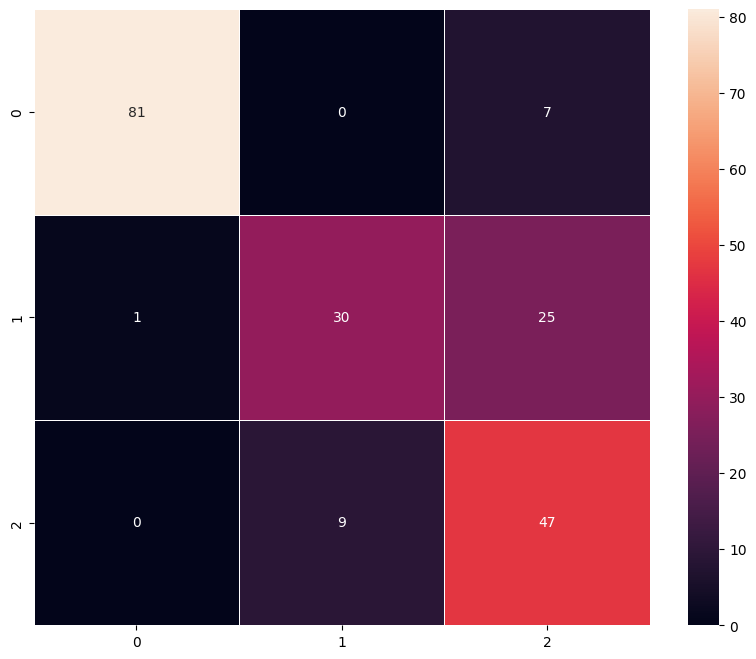

In [125]:
plot_confusion_matrix(model_4,X_train_edge,y_train_encoded)

# Model Performance Comparison and Final Model Selection

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [127]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [128]:
models_train_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.440000,0.780000,0.440000,0.790000
Recall,0.440000,0.780000,0.440000,0.790000
Precision,0.193600,0.799200,0.193600,0.816601
F1 Score,0.268889,0.785878,0.268889,0.791099


In [129]:
models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.440000,0.760000,0.440000,0.520000
Recall,0.440000,0.760000,0.440000,0.520000
Precision,0.193600,0.832727,0.193600,0.532000
F1 Score,0.268889,0.768889,0.268889,0.513583


In [130]:
models_train_comp_df - models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.0,0.020000,0.0,0.270000
Recall,0.0,0.020000,0.0,0.270000
Precision,0.0,-0.033527,0.0,0.284601
F1 Score,0.0,0.016989,0.0,0.277516


- X-ray images are grayscale by nature. For visualization purposes, RGB can be used.  

- From the experiment, we observed that the model trained with grayscale images outperformed the other models. This indicates that the grayscale channel alone is sufficient for understanding the image.

## Test Performance

In [132]:
model_2_test_perf = model_performance_classification(model_2,X_test_gray,y_test_encoded)

1/1 [==============================] - 0s 20ms/step


In [133]:
model_2_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.692308,0.692308,0.69493,0.691973


1/1 [==============================] - 0s 23ms/step


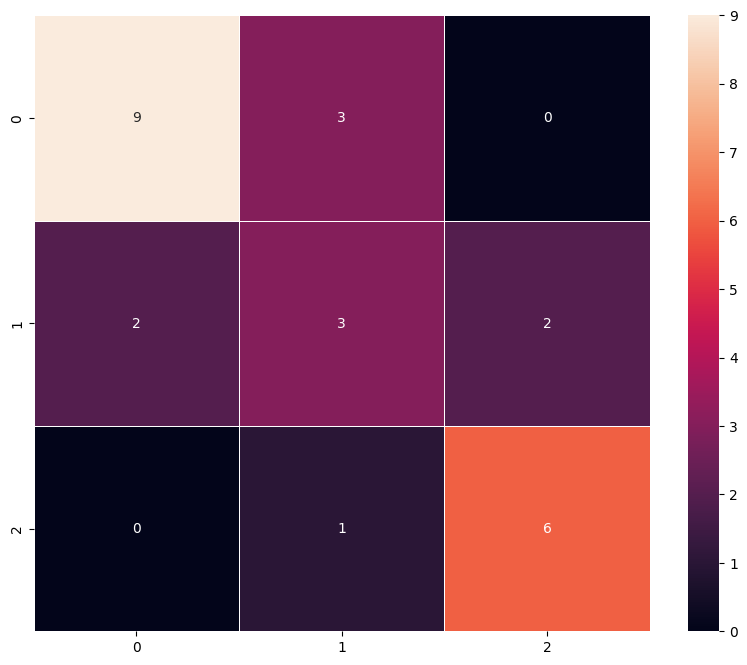

In [134]:
plot_confusion_matrix(model_2, X_test_gray,y_test_encoded)

#  Business Insights and Recommendations

- The ANN trained on the grayscale features demonstrates the best performance.
- Edge-based features cause overfitting, indicating they are ineffective without additional processing like background removal.  
- If edge features are to be used, implement preprocessing techniques such as background isolation to improve generalization.  
- Optimize the model for real-time classification by exploring lightweight architectures to reduce computational costs.  
- Investigate additional feature engineering approaches, such as texture or shape analysis, to enhance model robustness.

<font size=5 color='blue'>Power Ahead!</font>
___